# CALIFORNIA HOUSING PRICE

### Referensi

1. Dataset : https://drive.google.com/drive/folders/19YA_f36uGR86hTnZuX-Ech59s3AFzXXo?q=parent:19YA_f36uGR86hTnZuX-Ech59s3AFzXXo

2. Penjelasan California : https://id.wikipedia.org/wiki/California

3. Berita rumah penduduk California : https://www.detik.com/properti/berita/d-7060568/mayoritas-penduduk-california-baru-punya-rumah-di-atas-usia-49-tahun-kok-bisa

4. Metric Evaluation : https://www.trivusi.web.id/2023/03/perbedaan-mae-mse-rmse-dan-mape.html
5. Kategori Income : https://www.cekindo.com/blog/upper-middle-income-status


### Contents

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation


# Business Problem Understanding

### Context

California Housing Price adalah sebuah Dataset yang berisi mengenai data kependudukan dan perumahan di California dari sensus pada 1990. California sendiri merupakan negara bagian yang ada di Amerika Serikat barat dengan Scramento sebagai ibukotanya. Saat ini total penduduk California mencapai 39,2 juta jiwa. Luas negara bagian California yaitu 163.696 mil persegi (423.970 km2) [2].
Tingginya harga rumah di California berdampak pada mayoritas penduduk baru memiliki rumah diatas usia 49 Tahun [3]. Hal ini dikarenakan harga rumah di California mengalami kenaikan besar - besaran dan melampaui pendapatan dari penduduknya. Tidak hanya permasalahan jumlah penduduk yang kepemilikan rumah menurun, bahkan untuk penduduk yang sudah memiliki rumah masih terkendala untuk melunasi cicilannya. Oleh sebab itu diperlukan referensi acuan harga rumah yang sesuai dengan sepesifikasi rumah, lokasi dll.

### Problem Statement

Sesuai informasi diatas memang rata - rata penduduk California memiliki rumah diatas usia 49 Tahun, namun tidak menutup kemungkinan bahwa ada rezeki yang diperoleh. Apalagi mendapatkan rumah yang sesuai dengan keinginan, budget, lokasi, dan spesifikasi yang sesuai dapat memakan waktu yang lama. Jika harga rumah rendah dari pasaran memang akan menguntungkan bagi pembeli, namun berdampak pada pendapatan penjual yang berkurang. Sebaliknya jika harga rumah tinggi, maka pembeli akan ragu dan akan berpikir sangat lama untuk menetukan keputusan. **Agar memudahkan penduduk California baik penjual maupun pembeli maka perlu adanya referensi harga acuan rumah yang tepat**.

### Goals

Berdasarkan masalah tersebut. Tentu perusahaan penyedia jasa penjualan rumah memiliki tools yang dapat memprediksi dan membantu untuk dapat menentukan harga rumah di California. **Dengan adanya tools model ini diharapkan dapat membantu penjual dan pembeli sebagai alat pendukung keputusan dalam menjual dan membeli rumah**.

### Analytic Approach

Jadi, yang perlu kita lakukan adalah menganalisis data untuk dapat menemukan pola dari fitur-fitur yang ada pada dataset. Selanjutnya, kita akan membangun suatu model regresi yang bertujuan untuk menetukan harga, dan model metric mana yang terbaik.

### Metric Evaluation

Metric Evaluation yang akan dibuat yaitu :

1. Root Mean Squared Error (RMSE) : menghitung rata-rata dari selisih kuadrat antara nilai prediksi dan nilai aktual kemudian diambil akar kuadratnya.
2. Mean Absolute Error (MAE) : menghitung rata-rata dari selisih absolut antara nilai prediksi dan nilai aktual.
3. Mean Absolute Percentage Error (MAPE) : menghitung rata-rata dari selisih persentase antara nilai prediksi dan nilai aktual.
4. R-Square: mengukur kemampuan model dalam menjelaskan hasil prediksi

Selain itu, kita akan menggunakan R Square yang digunakan untuk mengukur kemampuan model untuk menjelaskan hasil prediksi


# Data Understanding

Dataset ini berisi informasi terkait data kependudukan dan perumahan di California dari sensus 1990, yaitu:

-	longitude
-	latitude
-	Housing median age
-	total_rooms
-	total_bedrooms
-	population
-	households
-	median_income
-	median house value
-	ocean_proximity


In [50]:
# Import library yang dibutuhkan untuk eksplorasi dataset
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
df = pd.read_csv(r"data_california_house.csv")
#menampilkan nama kolom 
display(df.head(),df.tail())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
14443,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0
14444,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0
14445,-121.90,36.58,31.0,1431.0,NaN,704.0,393.0,3.1977,NEAR OCEAN,289300.0
14446,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN,484600.0
14447,-115.56,32.80,15.0,1171.0,328.0,1024.0,298.0,1.3882,INLAND,69400.0


In [3]:
# melihat informasi dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


Terdapat 10 kolom dan 14.448 baris

In [4]:
#untuk melihat statistik deskriptif
display(df.describe(), df.describe(include='object'))

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,14448.000000,14448.000000,14448.000000,14448.000000,14311.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,-119.566647,35.630093,28.618702,2640.132683,538.260709,1425.157323,499.508929,3.866667,206824.624516
std,2.006587,2.140121,12.596694,2191.612441,423.577544,1149.580157,383.098390,1.891158,115365.476182
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1451.000000,295.000000,784.000000,279.000000,2.570600,119600.000000
50%,-118.490000,34.260000,29.000000,2125.000000,435.000000,1165.000000,410.000000,3.539100,180000.000000
75%,-118.000000,37.710000,37.000000,3148.000000,647.000000,1724.000000,604.000000,4.736100,263900.000000
max,-114.310000,41.950000,52.000000,32627.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


,ocean_proximity
count,14448
unique,5
top,<1H OCEAN
freq,6369


In [5]:
pd.set_option('display.max_colwidth', None)
#melihat data unik di kolom
listItem = []
for i in df.columns :
    listItem.append( [i, df[i].nunique(), df[i].unique()])

tabelDesc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabelDesc

,Column Name,Number of Unique,Unique Sample
0,longitude,806,"[-119.79, -122.21, -118.04, -118.28, -119.81, -117.79, -117.8, -121.26, -117.65, -122.27, -121.94, -121.9, -118.15, -117.5, -121.33, -115.99, -117.09, -118.14, -120.9, -121.51, -117.32, -117.34, -121.53, -118.27, -120.84, -120.38, -118.2, -121.52, -121.09, -117.54, -119.29, -119.83, -118.12, -118.31, -118.24, -117.62, -121.95, -117.88, -117.68, -121.92, -118.85, -122.41, -117.59, -121.86, -118.02, -122.43, -122.26, -117.02, -118.26, -121.36, -119.9, -121.85, -120.85, -118.21, -121.65, -119.74, -122.03, -117.69, -122.04, -122.25, -118.43, -121.91, -124.0, -117.82, -123.98, -121.99, -120.6, -118.22, -122.05, -121.64, -117.75, -117.25, -118.29, -122.7, -121.49, -122.28, -122.02, -121.47, -117.72, -117.31, -121.38, -117.17, -119.12, -121.2, -117.22, -122.47, -118.36, -124.16, -122.42, -117.92, -124.13, -122.24, -121.8, -117.93, -120.46, -116.86, -117.28, -120.99, -117.89, -118.39, ...]"
1,latitude,836,"[36.73, 37.77, 33.87, 34.06, 33.8, 33.81, 38.69, 33.48, 37.97, 37.28, 37.44, 34.05, 33.96, 38.64, 33.4, 32.68, 34.7, 38.2, 38.5, 34.14, 34.13, 38.61, 34.08, 38.77, 36.76, 33.93, 38.57, 38.68, 33.82, 37.98, 36.53, 36.8, 34.09, 33.67, 34.11, 38.31, 33.77, 35.63, 37.3, 34.21, 37.37, 37.6, 33.91, 37.32, 33.65, 37.71, 33.97, 37.88, 32.7, 33.94, 34.19, 38.67, 36.94, 38.0, 37.06, 36.71, 39.13, 34.44, 37.39, 37.36, 37.84, 34.22, 34.02, 33.71, 37.29, 40.22, 33.68, 40.88, 37.26, 33.95, 37.93, 36.68, 33.21, 34.17, 38.36, 38.58, 36.97, 37.9, 37.53, 33.51, 34.35, 32.77, 35.39, 33.84, 39.25, 34.26, 37.51, 35.6, 34.07, 40.79, 38.27, 33.63, 40.8, 37.59, 37.75, 34.03, 33.72, 38.09, 33.64, 33.05, ...]"
2,housing_median_age,52,"[52.0, 43.0, 17.0, 50.0, 11.0, 14.0, 6.0, 10.0, 18.0, 4.0, 31.0, 12.0, 27.0, 15.0, 20.0, 16.0, 25.0, 32.0, 29.0, 5.0, 38.0, 41.0, 9.0, 33.0, 24.0, 42.0, 44.0, 21.0, 35.0, 34.0, 7.0, 13.0, 22.0, 49.0, 26.0, 40.0, 3.0, 30.0, 39.0, 23.0, 46.0, 51.0, 47.0, 48.0, 28.0, 19.0, 37.0, 36.0, 2.0, 8.0, 45.0, 1.0]"
3,total_rooms,5227,"[112.0, 1017.0, 2358.0, 2518.0, 772.0, 10535.0, 1206.0, 3917.0, 1638.0, 15259.0, 4356.0, 1646.0, 3362.0, 7923.0, 2203.0, 1945.0, 2569.0, 1984.0, 3120.0, 4719.0, 1691.0, 331.0, 8149.0, 2265.0, 1013.0, 932.0, 857.0, 2360.0, 5218.0, 202.0, 2370.0, 1509.0, 3756.0, 3603.0, 1297.0, 2141.0, 3030.0, 1911.0, 777.0, 1519.0, 4334.0, 1335.0, 2195.0, 1476.0, 4424.0, 10223.0, 2519.0, 2548.0, 1508.0, 1903.0, 2363.0, 2756.0, 1510.0, 1678.0, 5819.0, 2513.0, 3364.0, 2609.0, 1026.0, 2574.0, 4833.0, 4257.0, 3280.0, 3240.0, 3298.0, 3549.0, 1588.0, 561.0, 4014.0, 3597.0, 2088.0, 7105.0, 1719.0, 4034.0, 2521.0, 1823.0, 7803.0, 6568.0, 1293.0, 1944.0, 1732.0, 5817.0, 2151.0, 2695.0, 2261.0, 564.0, 4280.0, 1072.0, 3617.0, 2404.0, 2943.0, 3856.0, 1264.0, 3301.0, 906.0, 2398.0, 8020.0, 4974.0, 3643.0, 2382.0, ...]"
4,total_bedrooms,1748,"[28.0, 328.0, 396.0, 1196.0, 194.0, 1620.0, 142.0, 638.0, 188.0, 2275.0, 1334.0, 408.0, 799.0, 1470.0, 493.0, 536.0, 737.0, 614.0, 641.0, 745.0, 353.0, 85.0, 1913.0, 801.0, 244.0, 201.0, 471.0, 711.0, 29.0, 424.0, 352.0, 681.0, 1003.0, 246.0, 451.0, 589.0, 439.0, 148.0, 388.0, 296.0, 414.0, 217.0, 834.0, 1491.0, 581.0, 646.0, 278.0, 469.0, 604.0, 516.0, 410.0, 277.0, 1507.0, 570.0, 645.0, 221.0, 807.0, 944.0, 1031.0, 933.0, 481.0, 460.0, 707.0, 360.0, 284.0, 868.0, 664.0, 535.0, 1459.0, 372.0, 611.0, 484.0, 358.0, 477.0, 1603.0, 339.0, 488.0, 305.0, 878.0, 96.0, 673.0, nan, 597.0, 390.0, 554.0, 875.0, 202.0, 712.0, 144.0, 448.0, 1432.0, 764.0, 706.0, 404.0, 241.0, 279.0, 732.0, 566.0, 226.0, 462.0, ...]"
5,population,3498,"[193.0, 836.0, 1387.0, 3051.0, 606.0, 4409.0, 572.0, 1809.0, 7266.0, 1968.0, 853.0, 1939.0, 4861.0, 1158.0, 515.0, 2341.0, 1071.0, 1319.0, 1857.0, 1457.0, 341.0, 2933.0, 2899.0, 410.0, 1043.0, 934.0, 1041.0, 1949.0, 75.0, 1129.0, 1734.0, 1586.0, 2719.0, 611.0, 1777.0, 1373.0, 930.0, 362.0, 1203.0, 635.0, 1360.0, 613.0, 1915.0, 5205.0, 2094.0, 755.0, 1138.0, 1882.0, 1558.0, 1849.0, 1408.0, 737.0, 3237.0, 1806.0, 1796.0, 789.

Secara garis besar kita mendapat informasi sebagai berikut :

1. Dataset memiliki 10 kolom dan 14.448 baris.
2. Kolom longitude dan Latitude adalah kolom unik yang saling berkaitan, karena jika kedua kolom digabung akan menjadikan koordinat lokasi.
3. Dari semua field data, Ocean proximity adalah satu satunya tipe object. Karena berisi dan menjelaskan mengenai lokasi berada.



### Exploratory Data Analysis



#### Location



Sebaran Lokasi perumahan di California 

Text(0.5, 1.0, 'Sebaran Lokasi Perumahan')

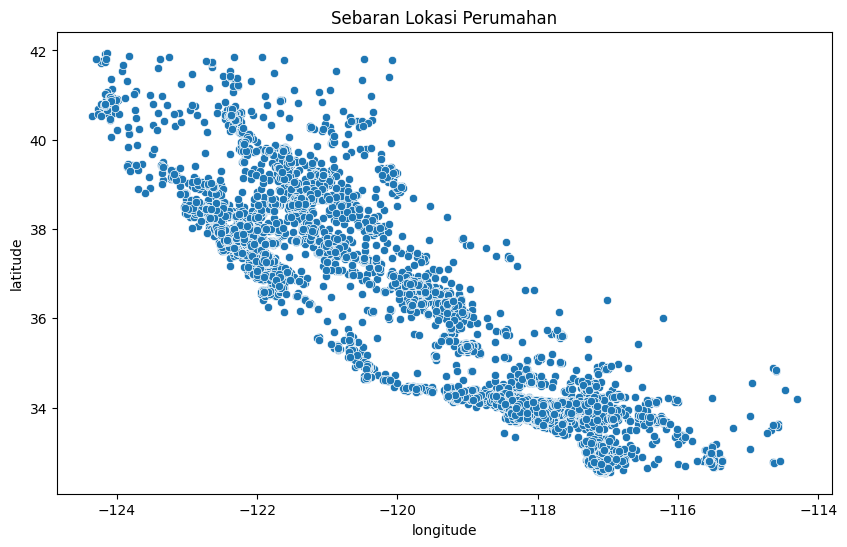

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['longitude'], y=df['latitude']).set_title('Sebaran Lokasi Perumahan')

Sebaran Lokasi perumahan di California berdasarkan Ocean Proximity

Text(0.5, 1.0, 'Sebaran Lokasi perumahan berdasarkan Ocean Proximity')

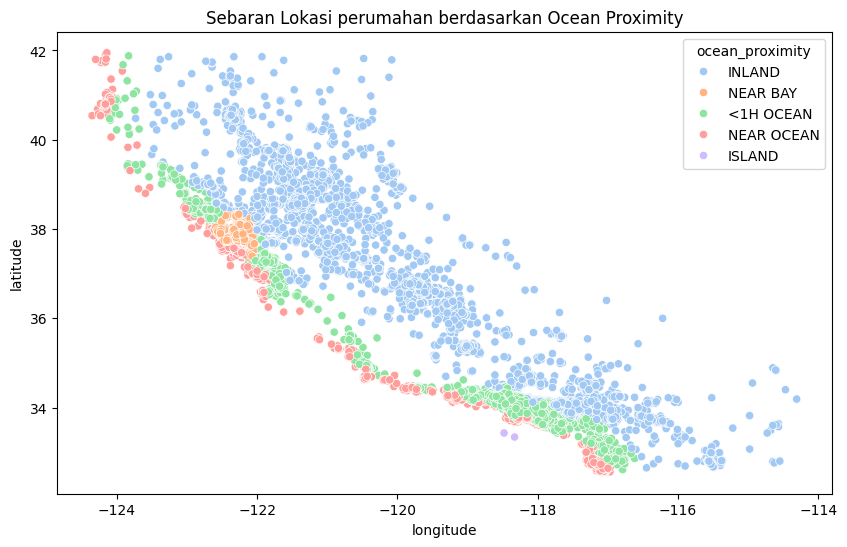

In [7]:
#Lokasi Perumahan berdasarkan Ocean Proximity
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['longitude'], y=df['latitude'], hue=df['ocean_proximity'], palette='pastel').set_title('Sebaran Lokasi perumahan berdasarkan Ocean Proximity')

Secara garis beras untuk lokasi perumahan banyak dijumpai di dekat laut. Mari kita lihat perbandingannya dengan dengan chart.

ocean_proximity
<1H OCEAN     6369
INLAND        4576
NEAR OCEAN    1879
NEAR BAY      1622
ISLAND           2
Name: count, dtype: int64

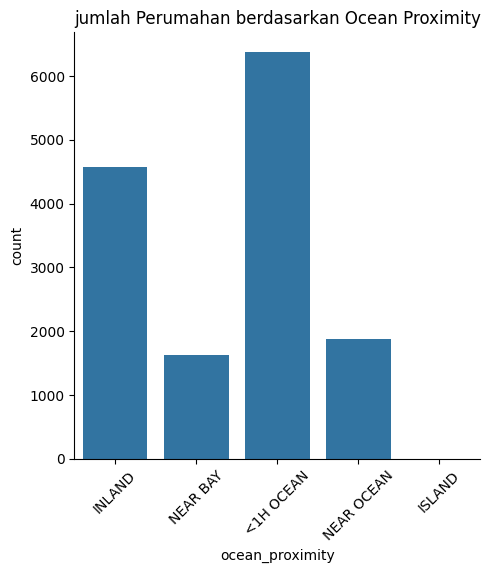

In [8]:
display(df['ocean_proximity'].value_counts())

sns.catplot(data=df, x='ocean_proximity', kind='count')
plt.xticks(rotation=45)
plt.title('jumlah Perumahan berdasarkan Ocean Proximity')
plt.show()

Dari data diatas kita dapat mendapatkan informasi bahwa sebaran perumahan untuk jarak <1H Ocean adalah yang paling banyak. diikuti oleh INland, NEar Ocean, Near bay dan terakhir Island

### Distribusi tiap Field Parameter

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

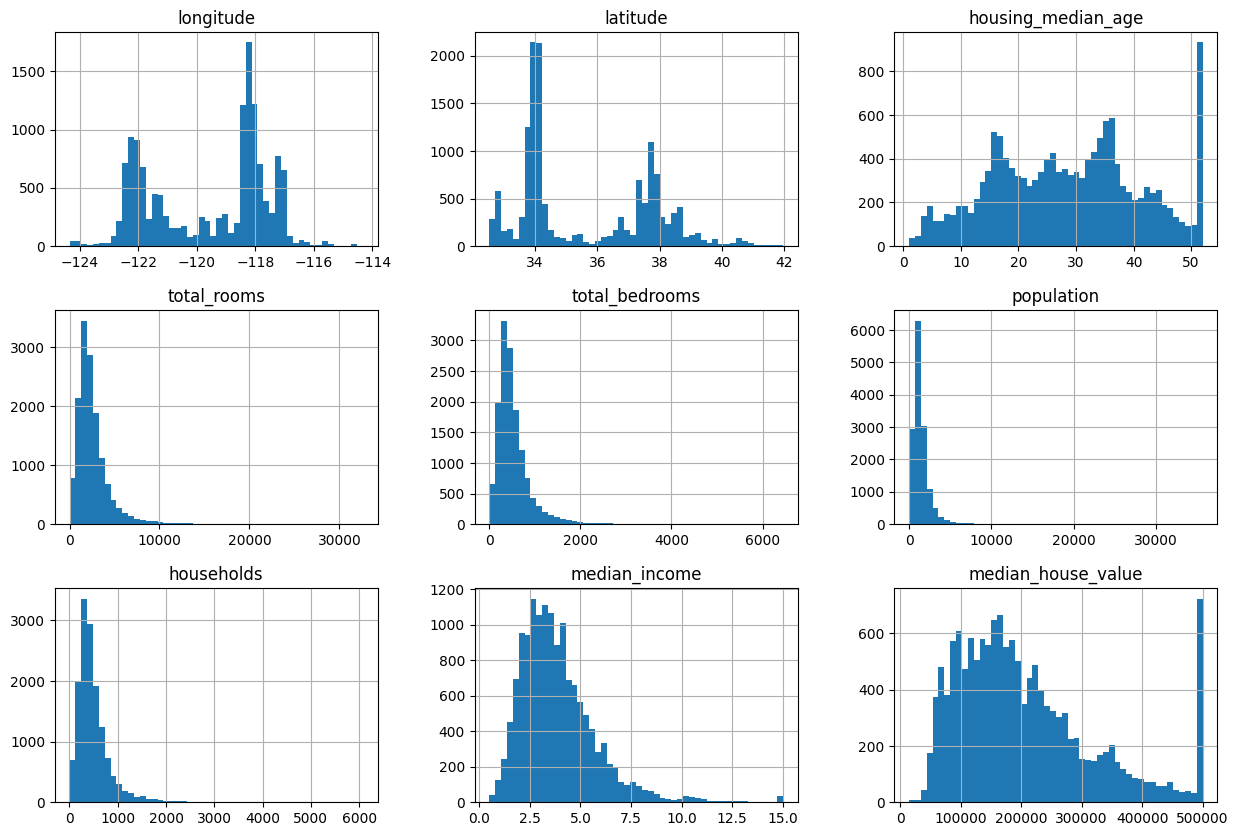

In [9]:
#menampilkan keseluruhan grafik
df.hist(bins=50,figsize=(15,10))

Dari grafik diatas didapatkan informasi bahwa distribusi tiap parameter tidak terdistribusi secara normal.

#### Housing Median Age, Median Income Mapping, Median House Value terhadap Location

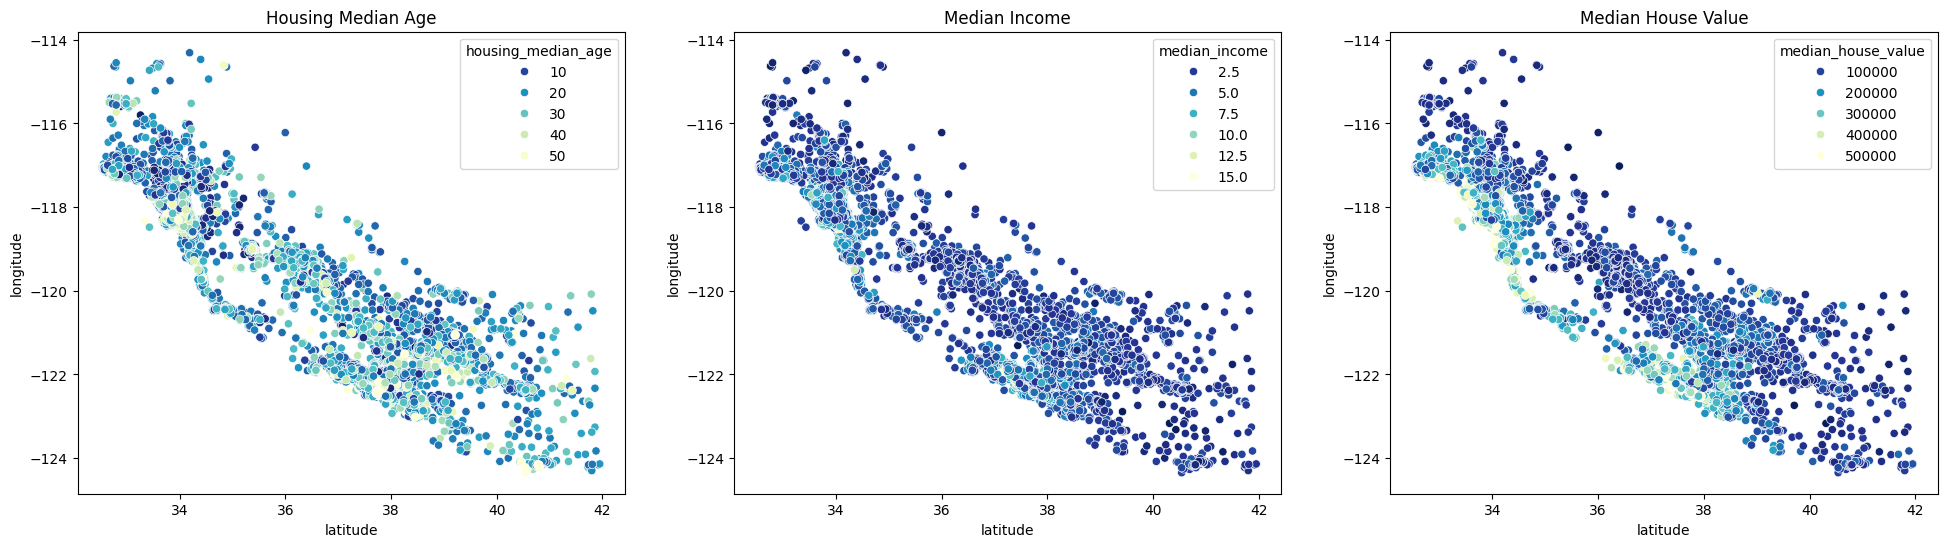

In [10]:

plt.figure(figsize=(24,6))

plt.subplot(1,3,1)
sns.scatterplot(data=df,x='latitude',y='longitude',hue='housing_median_age',palette='YlGnBu_r',sizes=(10,100))
plt.title('Housing Median Age')

plt.subplot(1,3,2)
sns.scatterplot(data=df,x='latitude',y='longitude',hue='median_income',palette='YlGnBu_r',sizes=(10,100))
plt.title('Median Income')

plt.subplot(1,3,3)
sns.scatterplot(data=df,x='latitude',y='longitude',hue='median_house_value',palette='YlGnBu_r',sizes=(10,100))
plt.title('Median House Value')



plt.show()

Secara garis besar kita mendapatkan informasi :
1. Rentang usia perumahan yang tersebar di California yaitu 10 hingga 50 tahun.
2. Pendapatan penduduk yang berada di pinggir laut terindikasi lebih tinggi.
3. Harga perumahan di daerah dekat laut, pulau, dan teluk realtif lebih tinggi dibandingkan INLAND 


#### Jumlah Housing, Households, Population berdasarkan Ocean Proximity

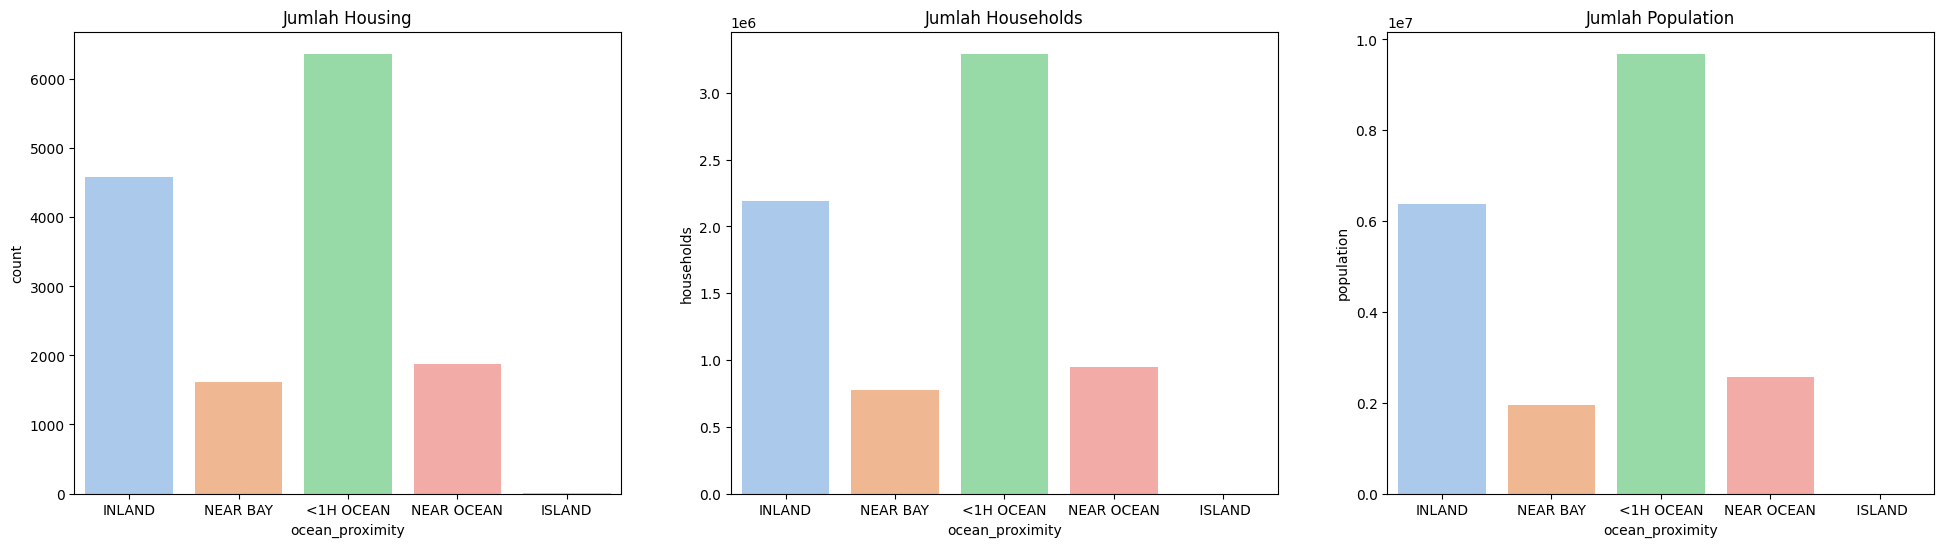

In [11]:
plt.figure(figsize=(24,6))

plt.subplot(1,3,1)
sns.countplot(data=df, x='ocean_proximity', palette="pastel")
plt.title('Jumlah Housing')

plt.subplot(1,3,2)
data = df.groupby('ocean_proximity')['households'].sum().reset_index()
sns.barplot(data=data, x='ocean_proximity', y='households', palette="pastel", order=['INLAND','NEAR BAY','<1H OCEAN','NEAR OCEAN',' ISLAND'])
plt.title('Jumlah Households')

plt.subplot(1,3,3)
data = df.groupby('ocean_proximity')['population'].sum().reset_index()
sns.barplot(data=data, x='ocean_proximity', y='population', palette="pastel", order=['INLAND','NEAR BAY','<1H OCEAN','NEAR OCEAN',' ISLAND'])
plt.title('Jumlah Population')

plt.show()

Secara garis besar kita mmeperoleh informasi bahwa ritme jumlah Housing, households, dan POpulation berdasatkan Ocean Proximity memiliki pola yang sama, yaitu jumlah <1H Ocean menjadi yang terbanyak, diikuti Inland, Near Ocean, Near Bay, dan Island.

# Data Preposition

Pada tahap ini kita akan melakukan cleaning, dimana data yang telah melalui proses cleaning nantinya akan menjadi data final yang kita gunakan.

#### Pengecekan Duplikasi Data

In [12]:
#Memeriksa banyak data yang terduplikat
df.duplicated().sum()

0

Tidak ditemukan data yang duplikat.

#### Missing Value

In [13]:
#Pengecekan missing value
df.isna().sum()/df.shape[0]*100

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        0.948228
population            0.000000
households            0.000000
median_income         0.000000
ocean_proximity       0.000000
median_house_value    0.000000
dtype: float64

dari data pencarian missing value, ditemukan kolom total_bedroom memiliki nilai kosong sebanyak 0.945228%

In [14]:
#Pengecekan Data Kosong
print(len(df[df.isna().any(axis=1)]))
df[df.isna().any(axis=1)]

137


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
88,-121.47,38.61,31.0,1072.0,NaN,781.0,281.0,1.6563,INLAND,65800.0
119,-117.28,34.26,18.0,3895.0,NaN,1086.0,375.0,3.3672,INLAND,133600.0
251,-117.61,34.08,12.0,4427.0,NaN,2400.0,843.0,4.7147,INLAND,158700.0
340,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN,146500.0
410,-122.42,40.44,16.0,994.0,NaN,495.0,181.0,2.1875,INLAND,76400.0
...,...,...,...,...,...,...,...,...,...,...
13856,-117.96,34.03,35.0,2093.0,NaN,1755.0,403.0,3.4115,<1H OCEAN,150400.0
13932,-117.87,33.83,27.0,2287.0,NaN,1140.0,351.0,5.6163,<1H OCEAN,231000.0
13989,-118.40,34.17,24.0,6347.0,NaN,2945.0,1492.0,3.3545,<1H OCEAN,221500.0
14308,-118.55,34.19,18.0,5862.0,NaN,3161.0,1280.0,3.1106,<1H OCEAN,170600.0


0.945228% jumlah baris yang kosong yaitu sebanyak 137 Baris. Dikarenakan persentase yang kecil dan juga memperhitungkan efisiensi kerja, kita akan melakukan penghapusan untuk data tersebut. Sehingga tidak diperlukan treatment khusus.

In [14]:
#Menghapus baris
df.dropna(inplace=True)
df.reset_index(drop=True,inplace=True)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0
...,...,...,...,...,...,...,...,...,...,...
14306,-120.06,36.94,19.0,901.0,183.0,700.0,190.0,2.2375,INLAND,64300.0
14307,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0
14308,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0
14309,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN,484600.0


Saat ini data baris menjadi 14.311 dari yang semula 14.448.

#### Pengecekan Nilai 0 dan nilai Negatif

In [15]:
display(df.describe(), df.describe(include='object'))

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,14311.000000,14311.000000,14311.000000,14311.000000,14311.000000,14311.000000,14311.000000,14311.000000,14311.000000
mean,-119.567150,35.631365,28.609671,2640.917686,538.260709,1424.772273,499.480470,3.866774,206793.156942
std,2.006374,2.139589,12.606493,2197.192896,423.577544,1151.795857,383.826005,1.890866,115404.371629
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1452.000000,295.000000,784.000000,279.000000,2.569400,119400.000000
50%,-118.490000,34.260000,29.000000,2125.000000,435.000000,1164.000000,410.000000,3.540300,180000.000000
75%,-118.000000,37.715000,37.000000,3142.000000,647.000000,1722.000000,603.500000,4.736100,263750.000000
max,-114.310000,41.950000,52.000000,32627.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


,ocean_proximity
count,14311
unique,5
top,<1H OCEAN
freq,6300


Dari pengecekan berulang juga tidak ditemukan nilai 0 atau negatif untuk data selain longitude dan latitude

#### Pengecekan Outliers

Dari Grafik Disitribusi tiap Field Parameter kita juga melihat ada nilai yang menjulang tinggi dibandingkan dengan nilai lainnya, yaitu pada housing_median_age dan median_house_value.

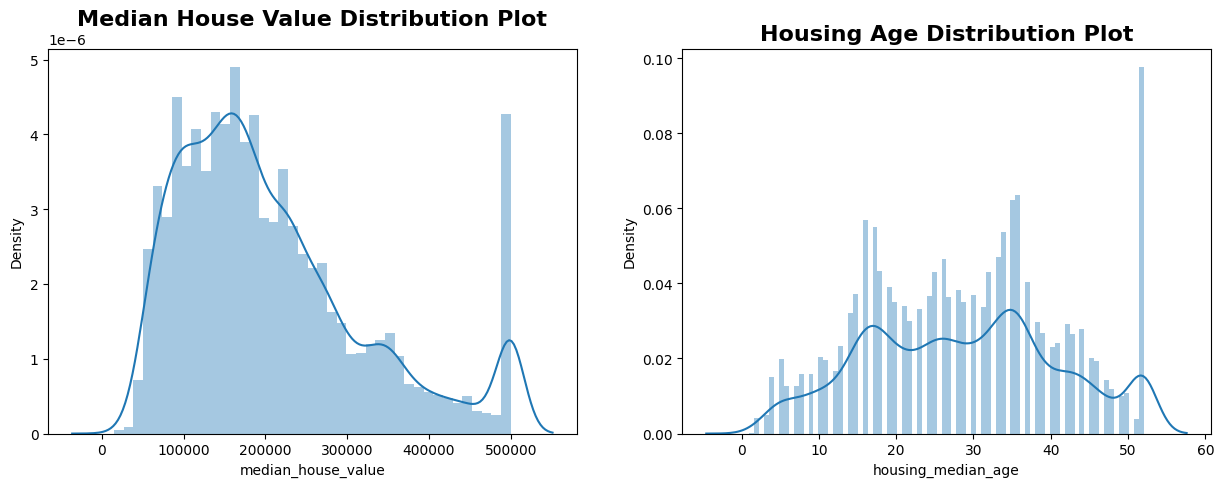

In [17]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.distplot(df['median_house_value'])
plt.title('Median House Value Distribution Plot', size=16, weight='bold')

plt.subplot(1,2,2)
sns.distplot(df['housing_median_age'], bins=80)
plt.title('Housing Age Distribution Plot', size=16, weight='bold');

Pada kedua grafik diatas ditemukan kesamaan yaitu memiliki nilai yang sagat tinggi di numeral terakahir.

#### Median House Value

In [18]:
print("Jumlah median house value")
df[df['median_house_value']>480000]['median_house_value'].value_counts().head()

Jumlah median house value


median_house_value
500001.0    672
500000.0     18
483300.0      6
485000.0      2
491200.0      2
Name: count, dtype: int64

Didapatkan bahwa variasi nilai untuk 500001 sangat banyak yaitu 672. Diasumsikan bahwa petugas sensus memberikan nilai 500001 untuk nilai yang lebih dari 500000. Untuk meminimalisir bias, maka kita akan menghapus nilai tersebut. 

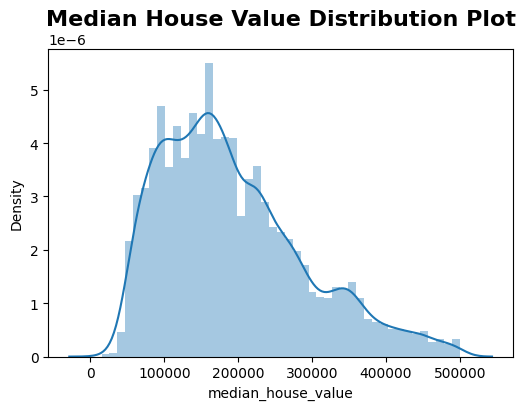

In [19]:
#menghapus outliers
df = df.drop(df[df['median_house_value']==500001].index)  
plt.figure(figsize=(6, 4))
sns.distplot(df['median_house_value'])
#menampilkan Median house seteleh penghapusan outlier
plt.title('Median House Value Distribution Plot', size=16, weight='bold');

#### Housing Median Age

In [20]:
print("Jumlah Housing Median Age")
df[df['housing_median_age']>45]['housing_median_age'].value_counts().head()

Jumlah Housing Median Age


housing_median_age
52.0    766
46.0    170
47.0    124
48.0    105
50.0     87
Name: count, dtype: int64

Didapatkan informasi bahwa Housing Median Age untuk nilai 52 tahun sangat tinggi dibandingkan yang lain. Diasumsikan bahwa petugas sensus memberi nilai 52 tahun untuk nilai yang lebih dari 50. Untuk meminimalisir bias, maka kita akan menghapusnya.

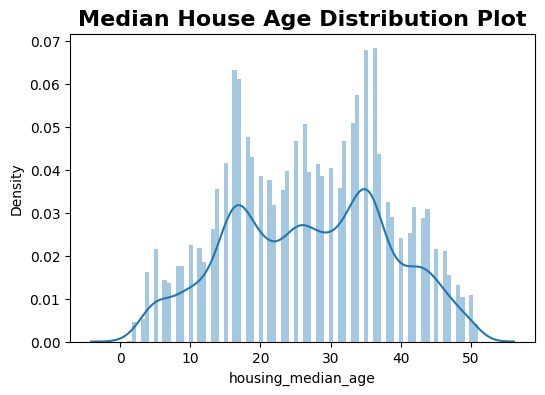

In [21]:
#menghapus nilai 52 tahun
df = df.drop(df[df['housing_median_age']==52.0].index)  
plt.figure(figsize=(6, 4))
sns.distplot(df['housing_median_age'], bins=80)
#menampikan nilai HOUSING median age setelah penghapusan outlier
plt.title('Median House Age Distribution Plot', size=16, weight='bold');



#### Pengecekan Island

Dari data yang kita dapatkan, pada Ocean Proximity ada kategori yang bernilai hanya 1 data, yaitu Island. Dikarenakan jumlah ini sangat sedikit untuk dilakukan testing, maka kita tidak menggunakan kategori Island dan akan menghapusnya. Selain itu kita asumsikan untuk fokus pada perumahan di daratan besar Amerika.

In [26]:
display(df['ocean_proximity'].value_counts())

ocean_proximity
<1H OCEAN     5753
INLAND        4410
NEAR OCEAN    1620
NEAR BAY      1089
Name: count, dtype: int64

In [27]:
df = df.drop(df[df['ocean_proximity']=='ISLAND'].index)  
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     5753
INLAND        4410
NEAR OCEAN    1620
NEAR BAY      1089
Name: count, dtype: int64

In [28]:
pd.set_option('display.max_colwidth', None)
#melihat data unik di kolom
listItem = []
for i in df.columns :
    listItem.append( [i, df[i].nunique(), df[i].unique()])

tabelDesc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabelDesc

,Column Name,Number of Unique,Unique Sample
0,longitude,801,"[-122.21, -118.04, -118.28, -119.81, -117.79, -117.8, -121.26, -122.27, -121.94, -121.9, -118.15, -117.5, -121.33, -115.99, -117.09, -118.14, -120.9, -121.51, -117.32, -117.34, -121.53, -118.27, -120.84, -120.38, -118.2, -121.52, -121.09, -117.54, -119.29, -119.83, -118.12, -118.31, -118.24, -117.62, -117.88, -117.68, -121.92, -118.85, -122.41, -117.59, -121.86, -118.02, -117.02, -118.26, -121.36, -119.9, -121.85, -120.85, -118.21, -121.65, -119.74, -122.03, -117.69, -122.04, -118.43, -121.91, -124.0, -117.82, -123.98, -121.99, -120.6, -118.22, -122.05, -121.64, -117.75, -117.25, -122.7, -122.02, -117.72, -117.31, -121.38, -117.17, -119.12, -121.2, -117.22, -122.47, -118.36, -122.42, -117.92, -124.13, -122.24, -121.8, -118.29, -117.93, -120.46, -116.86, -120.99, -117.89, -118.39, -121.89, -117.15, -118.18, -119.46, -121.84, -119.82, -121.31, -117.3, -118.42, -122.53, -116.99, ...]"
1,latitude,832,"[37.77, 33.87, 34.06, 36.73, 33.8, 33.81, 38.69, 37.97, 37.28, 37.44, 34.05, 33.96, 38.64, 33.4, 32.68, 34.7, 38.2, 38.5, 34.14, 34.13, 38.61, 34.08, 38.77, 36.76, 33.93, 38.57, 38.68, 33.82, 37.98, 36.53, 36.8, 34.09, 33.67, 34.11, 38.31, 33.77, 35.63, 37.3, 34.21, 37.6, 33.91, 37.32, 33.65, 33.97, 32.7, 33.94, 34.19, 38.67, 36.94, 38.0, 37.06, 36.71, 39.13, 34.44, 37.39, 33.48, 37.36, 34.22, 34.02, 33.71, 37.29, 40.22, 33.68, 40.88, 37.26, 33.95, 37.93, 36.68, 33.21, 38.36, 36.97, 34.17, 37.53, 33.51, 34.35, 32.77, 35.39, 33.84, 39.25, 34.26, 37.51, 35.6, 34.07, 38.27, 33.63, 40.8, 37.59, 34.03, 33.72, 38.09, 33.64, 33.05, 39.22, 33.61, 34.23, 37.23, 32.81, 33.86, 35.13, 37.33, ...]"
2,housing_median_age,51,"[43.0, 17.0, 50.0, 11.0, 14.0, 10.0, 18.0, 4.0, 31.0, 12.0, 27.0, 15.0, 20.0, 16.0, 25.0, 32.0, 29.0, 5.0, 38.0, 41.0, 6.0, 9.0, 33.0, 24.0, 42.0, 44.0, 21.0, 35.0, 7.0, 13.0, 22.0, 49.0, 26.0, 34.0, 40.0, 3.0, 30.0, 39.0, 23.0, 46.0, 51.0, 47.0, 48.0, 28.0, 19.0, 37.0, 36.0, 2.0, 8.0, 45.0, 1.0]"
3,total_rooms,4979,"[1017.0, 2358.0, 2518.0, 772.0, 10535.0, 1206.0, 3917.0, 15259.0, 4356.0, 1646.0, 3362.0, 7923.0, 2203.0, 1945.0, 2569.0, 1984.0, 3120.0, 4719.0, 1691.0, 331.0, 8149.0, 2265.0, 1013.0, 932.0, 857.0, 2360.0, 5218.0, 202.0, 2370.0, 1509.0, 3756.0, 3603.0, 1297.0, 2141.0, 3030.0, 1911.0, 1519.0, 4334.0, 1335.0, 2195.0, 4424.0, 10223.0, 2519.0, 2548.0, 1903.0, 2756.0, 1510.0, 1678.0, 5819.0, 2513.0, 3364.0, 2609.0, 1026.0, 2574.0, 4833.0, 4257.0, 3280.0, 3240.0, 3298.0, 1588.0, 561.0, 4014.0, 3597.0, 2088.0, 7105.0, 1719.0, 4034.0, 2521.0, 1823.0, 7803.0, 6568.0, 1293.0, 1944.0, 5817.0, 2695.0, 564.0, 4280.0, 3617.0, 2404.0, 2943.0, 3856.0, 1264.0, 3301.0, 906.0, 2398.0, 8020.0, 4974.0, 3643.0, 2382.0, 1577.0, 2936.0, 3282.0, 1469.0, 2152.0, 1165.0, 1703.0, 651.0, 1938.0, 1394.0, 3313.0, ...]"
4,total_bedrooms,1727,"[328.0, 396.0, 1196.0, 194.0, 1620.0, 142.0, 638.0, 2275.0, 1334.0, 408.0, 799.0, 1470.0, 493.0, 536.0, 737.0, 614.0, 641.0, 745.0, 353.0, 85.0, 1913.0, 801.0, 188.0, 244.0, 201.0, 471.0, 711.0, 29.0, 424.0, 352.0, 681.0, 1003.0, 246.0, 451.0, 589.0, 439.0, 388.0, 296.0, 414.0, 834.0, 1491.0, 581.0, 646.0, 469.0, 516.0, 410.0, 277.0, 1507.0, 570.0, 645.0, 221.0, 807.0, 944.0, 1031.0, 933.0, 481.0, 460.0, 360.0, 284.0, 868.0, 664.0, 535.0, 1459.0, 372.0, 611.0, 484.0, 358.0, 477.0, 1603.0, 339.0, 488.0, 878.0, 96.0, 673.0, 597.0, 390.0, 554.0, 875.0, 202.0, 712.0, 144.0, 448.0, 1432.0, 764.0, 706.0, 404.0, 241.0, 279.0, 732.0, 566.0, 226.0, 462.0, 333.0, 397.0, 157.0, 301.0, 238.0, 1235.0, 585.0, 715.0, ...]"
5,population,3441,"[836.0, 1387.0, 3051.0, 606.0, 4409.0, 572.0, 1809.0, 7266.0, 1968.0, 853.0, 1939.0, 4861.0, 1158.0, 515.0, 2341.0, 1071.0, 1319.0, 1857.0, 1457.0, 341.0, 2933.0, 2899.0, 410.0, 1043.0, 934.0, 1041.0, 1949.0, 75.0, 1129.0, 1734.0, 1586.0, 2719.0, 611.0, 1777.0, 1373.0, 930.0, 1203.0, 635.0, 1360.0, 1915.0, 5205.0, 2094.0, 755.0, 1882.0, 1849.0, 1408.0, 737.0, 3237.0, 1806.0, 1796.0, 789.0, 3163.0, 2336.0, 1861.0, 1842.0, 146

In [29]:
display(df.head(),df.tail())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0
5,-117.79,33.80,11.0,10535.0,1620.0,4409.0,1622.0,6.6700,<1H OCEAN,283200.0


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
14306,-120.06,36.94,19.0,901.0,183.0,700.0,190.0,2.2375,INLAND,64300.0
14307,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0
14308,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0
14309,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN,484600.0
14310,-115.56,32.80,15.0,1171.0,328.0,1024.0,298.0,1.3882,INLAND,69400.0


### Kategori Income

Berikut kita kana mengkategorikan income dari kolom median_income. Pengkategorian berdasar referensi [5].

Low-income : Below USD 1,135
Lower-middle-income : From USD 1,135 to USD 4,465
Upper-middle-income : From USD 4,466 to USD 13,845
High-income countries: USD 13,845 and above

In [31]:
incomeGroup = [0, 1.6383, 2.7306, 5.4613, 19.1146]
incomeCategory = ['Low Income', 'Lower-middle Income', 'Upper-middle income', 'High Income']
df['kategori_income'] = pd.cut(df['median_income'], bins=incomeGroup, labels=incomeCategory)
display(df['kategori_income'].value_counts())

kategori_income
Upper-middle income    7205
Lower-middle Income    3237
High Income            1711
Low Income              719
Name: count, dtype: int64

In [32]:
display(df.head(),df.tail())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,kategori_income
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0,Lower-middle Income
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0,High Income
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0,Lower-middle Income
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0,Lower-middle Income
5,-117.79,33.80,11.0,10535.0,1620.0,4409.0,1622.0,6.6700,<1H OCEAN,283200.0,High Income


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,kategori_income
14306,-120.06,36.94,19.0,901.0,183.0,700.0,190.0,2.2375,INLAND,64300.0,Lower-middle Income
14307,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0,Upper-middle income
14308,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0,Upper-middle income
14309,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN,484600.0,High Income
14310,-115.56,32.80,15.0,1171.0,328.0,1024.0,298.0,1.3882,INLAND,69400.0,Low Income


Dapat kita cek ada tambahan kolom untuk kategori income.

### Modelling

In [33]:
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

!pip install category_encoders
!pip install xgboost
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
#duplikasi dataframe
df_model = df.copy()
df_model.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,kategori_income
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0,Lower-middle Income
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0,High Income
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0,Lower-middle Income
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0,Lower-middle Income
5,-117.79,33.80,11.0,10535.0,1620.0,4409.0,1622.0,6.6700,<1H OCEAN,283200.0,High Income


### Encoding

Dikarenakan adanya tipe data yang object, maka kita akan mengubah fitur menjadi numerikal, hal ini agar data dapat digunakan.

In [37]:
# Mengubah fitur kategorikal menjadi numerikal

transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(drop='first', handle_unknown='ignore'), ['ocean_proximity', 'kategori_income'])
], remainder='passthrough')

### Data Splitting

Kemudian kita akan memisahkan data, yaitu data X sebagai independen, dan Y ada sebagai variabel dependent.

In [39]:
# Memisahkan data independen variabel dengan target
X = df_model.drop(['median_house_value'], axis=1)
y = df_model['median_house_value']

### Train and Test Splitting

UNtuk data splliting kita akan menggunakan proporsi 70:30

In [40]:
# Splitting data training dan test dengan proporsi 70:30
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,  
    test_size=0.3,
    random_state=1)

### Choose a Bencmarking Model

Selanjutnya kita akan melakukan benchmarking denganmeggunakan RMSE, MAE, dan MAPE.

In [41]:
# Define algoritma yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
xgb = XGBRegressor(random_state=1)

# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# Scaling data
scaler = StandardScaler()

# Kandidat algoritma
models = [log_lr, log_knn, log_dt, log_rf, log_xgb]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Mencari algoritma terbaik berdasarkan tiap metrics
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[-60019.93140227 -60797.55677581 -66558.29399827 -64698.87646091
 -60110.73303265] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-41722.03921961 -42578.00294555 -41578.4055461  -41661.10689783
 -42290.76788834] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-0.24137961 -0.23606299 -0.23566979 -0.23691501 -0.23978115] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())


[-55916.05812017 -58219.98041647 -56687.59017825 -54926.11045186
 -55327.62131482] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-38652.0485762  -39356.97749133 -38715.28375682 -38238.30035557
 -38660.83301553] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-0.22004103 -0.20992279 -0.21999374 -0.21678962 -0.21534517] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-64051.39270576 -69194.18219884 -66568.19015165 -64399.76591702
 -60886.76101159] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=DecisionTreeRegressor(random_state=1))
[-43798.11376249 -46661.70921199 -44634.51720311 -43540.23307436
 -41622.36459489] TransformedTargetRegressor(func=<ufunc 'log'>, inv

In [42]:
# Evaluasi hasil dari 5 kandidat algoritma yang digunakan
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-62437.078334,2684.871021,-41966.064499,395.658411,-0.237962,0.002234
1,KNN Regressor,-56215.472096,1164.588363,-38724.688639,359.389851,-0.216418,0.003725
2,DecisionTree Regressor,-65020.058397,2765.040495,-44051.387569,1635.811627,-0.253056,0.009164
3,RandomForest Regressor,-46773.566491,970.520672,-30863.139209,499.961695,-0.173770,0.004888
4,XGBoost Regressor,-45507.847668,996.648462,-29966.530679,752.008796,-0.167436,0.003509


Berdasarkan hasil evaluasi diatasdi dapat bahwa terdapat 3 model yang baik, yaitu, Linear Regresion, Random Forest dan  XGBOOST. Selanjutnya kita akan membandingkan ketiga model tersebut pada prediksi dataset X test.


### Prediction

In [43]:
# Benchmark 3 model terbaik
models = {
    'XGB': XGBRegressor(random_state=1),
    'RandomForest': RandomForestRegressor(random_state=1),
    'LinearRegression': LinearRegression()
}

score_rmse = []
score_mae = []
score_mape = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE
XGB,45171.864601,30334.441257,0.177809
RandomForest,46181.243551,31698.671388,0.185271
LinearRegression,59714.809887,43713.805337,0.266113


Hasil prediksi menunjukkan bahwa XGB lebih unggul dalam memprediksi, dengan evaluasi metrik sbb :
- RMSE = 45171, nilai error antara prediksi dan nilai sebenarnya adalah USD 45171 USD
- MAE = 30334, nilai absolut error prediksi adalah USD 30334.
- MAPE = 0.177, nilai error prediksi dari nilai sebenarnya adalah 0.177%


### Hyperparameter Tuning

Dari Evaluasi diatas didapat bahwa XGB memiliki performa yang lebih baik dibanding Random forest. Maka selanjutnya kita akan menggunakan model XGB sebagai model akhir. selanjutnya kita akan melakukan hyperparameter tuning pada model XGBoost.


In [44]:
# Kedalaman pohon
max_depth = list(np.arange(1, 11))

# Learning rate
learning_rate = list(np.arange(1, 100)/100)

# Jumlah pohon
n_estimators = list(np.arange(100, 201))

# Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(1, 10)/10)

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10)) # Semakin besar nilainya, semakin konservatif/simpel modelnya


# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [45]:
# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state=1, verbosity=0)

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 1  
)

In [46]:
# Fitting data training untuk mencari parameter terbaik
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(drop='first',
                                                                                             handle_unknown='ignore'),
                                                                               ['ocean_proximity',
                                                                                'kategori_income'])])),
                                             ('scaler', StandardScaler()),
                                             ('model',
                                              XGBRegressor(base_score=None,
                                                           booster=Non...
                                                             0.007742636826811269,
                                                             0.021544346900318832,
                                                             0.05994842503189409,
                                                             0.1668100537200059,
                                                             0.46415888336127775,
                                                             1.2915496650148828,
                                                             3.593813663804626,
                                                             10.0],
                                        'model__subsample': [0.2, 0.3, 0.4, 0.5,
                                                             0.6, 0.7, 0.8,
                                                             0.9]},
                   random_state=1, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [39]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE & MAPE
pd.DataFrame(random_xgb.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__gamma,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
7,2.652937,0.232415,0.063720,0.014549,0.9,0.059948,119,8,0.05,5,...,436.795208,1,-0.185624,-0.170818,-0.177697,-0.175699,-0.176875,-0.177343,0.004779,1
20,0.608683,0.028584,0.019865,0.004481,0.9,0.007743,143,4,0.38,6,...,873.345602,2,-0.188366,-0.186920,-0.184342,-0.183041,-0.184408,-0.185416,0.001938,2
17,1.088608,0.016144,0.028619,0.005119,0.6,0.001,190,5,0.04,9,...,381.518331,3,-0.198373,-0.182471,-0.188590,-0.188544,-0.190315,-0.189659,0.005107,3
3,1.910905,0.222201,0.058157,0.014792,0.5,0.021544,166,8,0.1,9,...,446.701078,4,-0.198680,-0.190451,-0.194771,-0.195743,-0.195805,-0.195090,0.002663,4
23,0.543622,0.043014,0.021466,0.003409,0.9,3.593814,153,4,0.33,9,...,563.922236,7,-0.202352,-0.194281,-0.202972,-0.200478,-0.198758,-0.199768,0.003117,8


In [40]:
# Cek skor dan params terbaik
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -44428.30293293159
Best_params: {'model__subsample': 0.9, 'model__reg_alpha': 0.05994842503189409, 'model__n_estimators': 119, 'model__max_depth': 8, 'model__learning_rate': 0.05, 'model__gamma': 5, 'model__colsample_bytree': 0.8}


### Predict to test Set with Tunel Model

In [52]:
# Model XGBoost
model = {'XGB': XGBRegressor(random_state=1)}

# Define model terhadap estimator terbaik
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model.keys())
score_after_tuning



,RMSE,MAE,MAPE
XGB,44202.48648,30024.722846,0.175635


### Evaluation Sebelum dan sesudah Tunel

In [43]:
#Benchmark Model
pd.DataFrame(score_before_tuning.loc['XGB']).T

,RMSE,MAE,MAPE
XGB,45171.864601,30334.441257,0.177809


In [45]:
#Tuned Model
score_after_tuning

,RMSE,MAE,MAPE
XGB,44202.48648,30024.722846,0.175635


Model mengalamai kenaikan performance :
1. RMSE : terjadi penurunan jumlah sebesar 969.378121
2. MAE : terjadi penurunan jumlah sebesar 309.718411
3. MAPE : terjadi pengingkatan persentasi mape 0.002174



In [42]:
#Skor R-Square setelah tuning
xgb_tuning.score(X_test,y_test)

0.7873068614684327

Setelah dilakukan tuning model XGBoost didapatkan Nilai R-Square : 0.787%

### Feature Importance

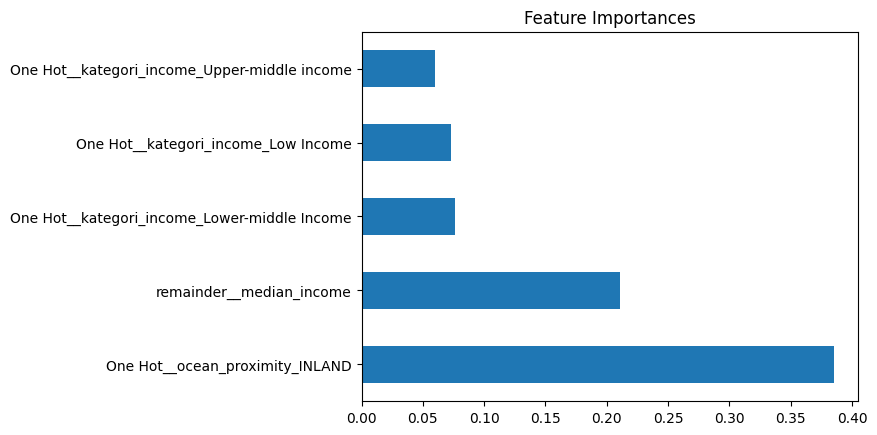

In [57]:
#Memeriksa kepentingan fitur dalam pemodelan
feature_imp = pd.Series(xgb_tuning['model'].feature_importances_, transformer.get_feature_names_out ()).sort_values(ascending = False).head()
feature_imp.plot(kind='barh', title='Feature Importances');

Dari grafik diatas dapat dilihat bahwa, One Hot Ocean Proximity Inland memiliki signifikansi yang paling tinggi di dalam model dengan skor hampir mendekati 0.40, diikuti oleh remainder_median_income..


### Perbandingan Aktual Price dan Prediksi

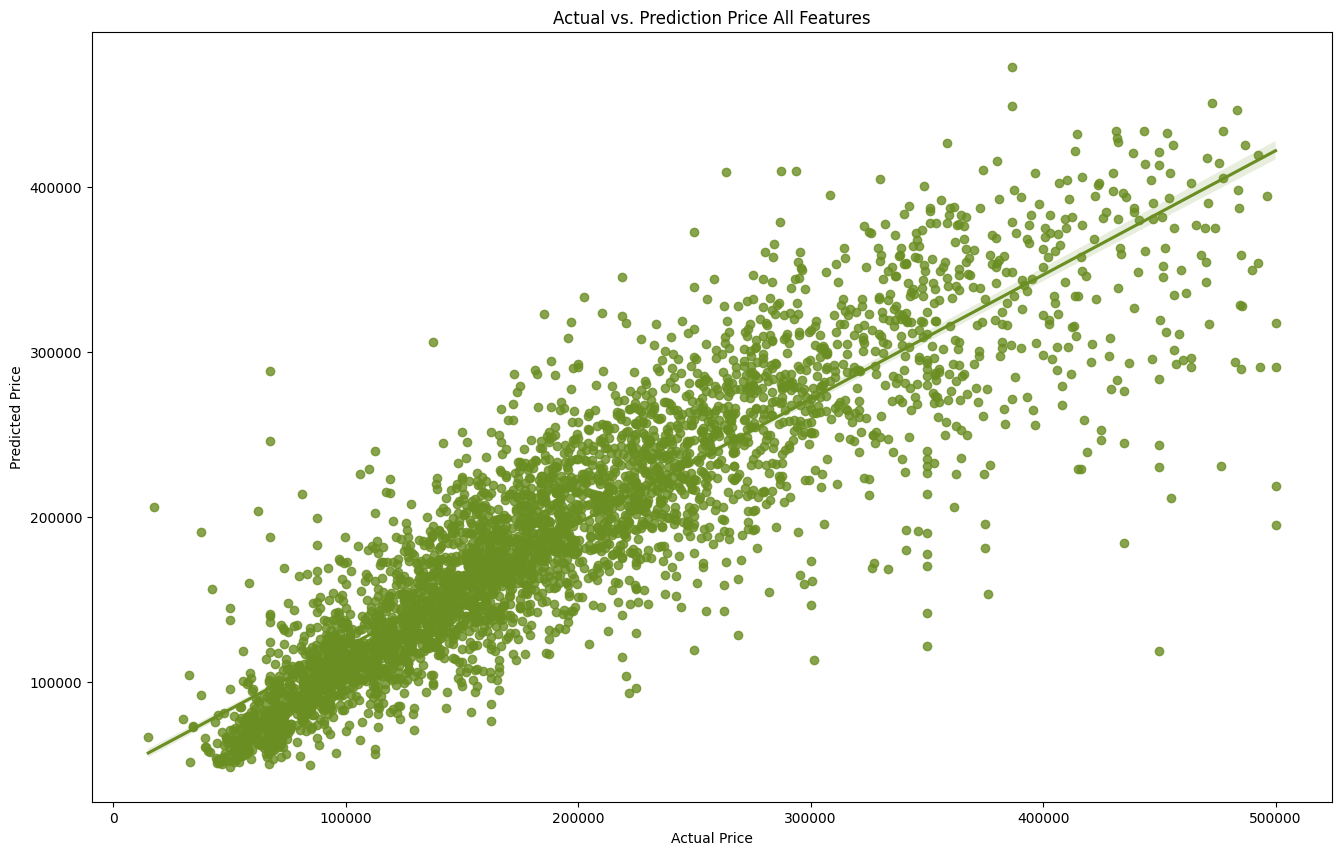

In [58]:
plt.figure(figsize=(16, 10))


sns.regplot(x=y_test, y=y_pred_xgb_tuning,color='olivedrab')
plt.title('Actual vs. Prediction Price All Features')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')


plt.show()

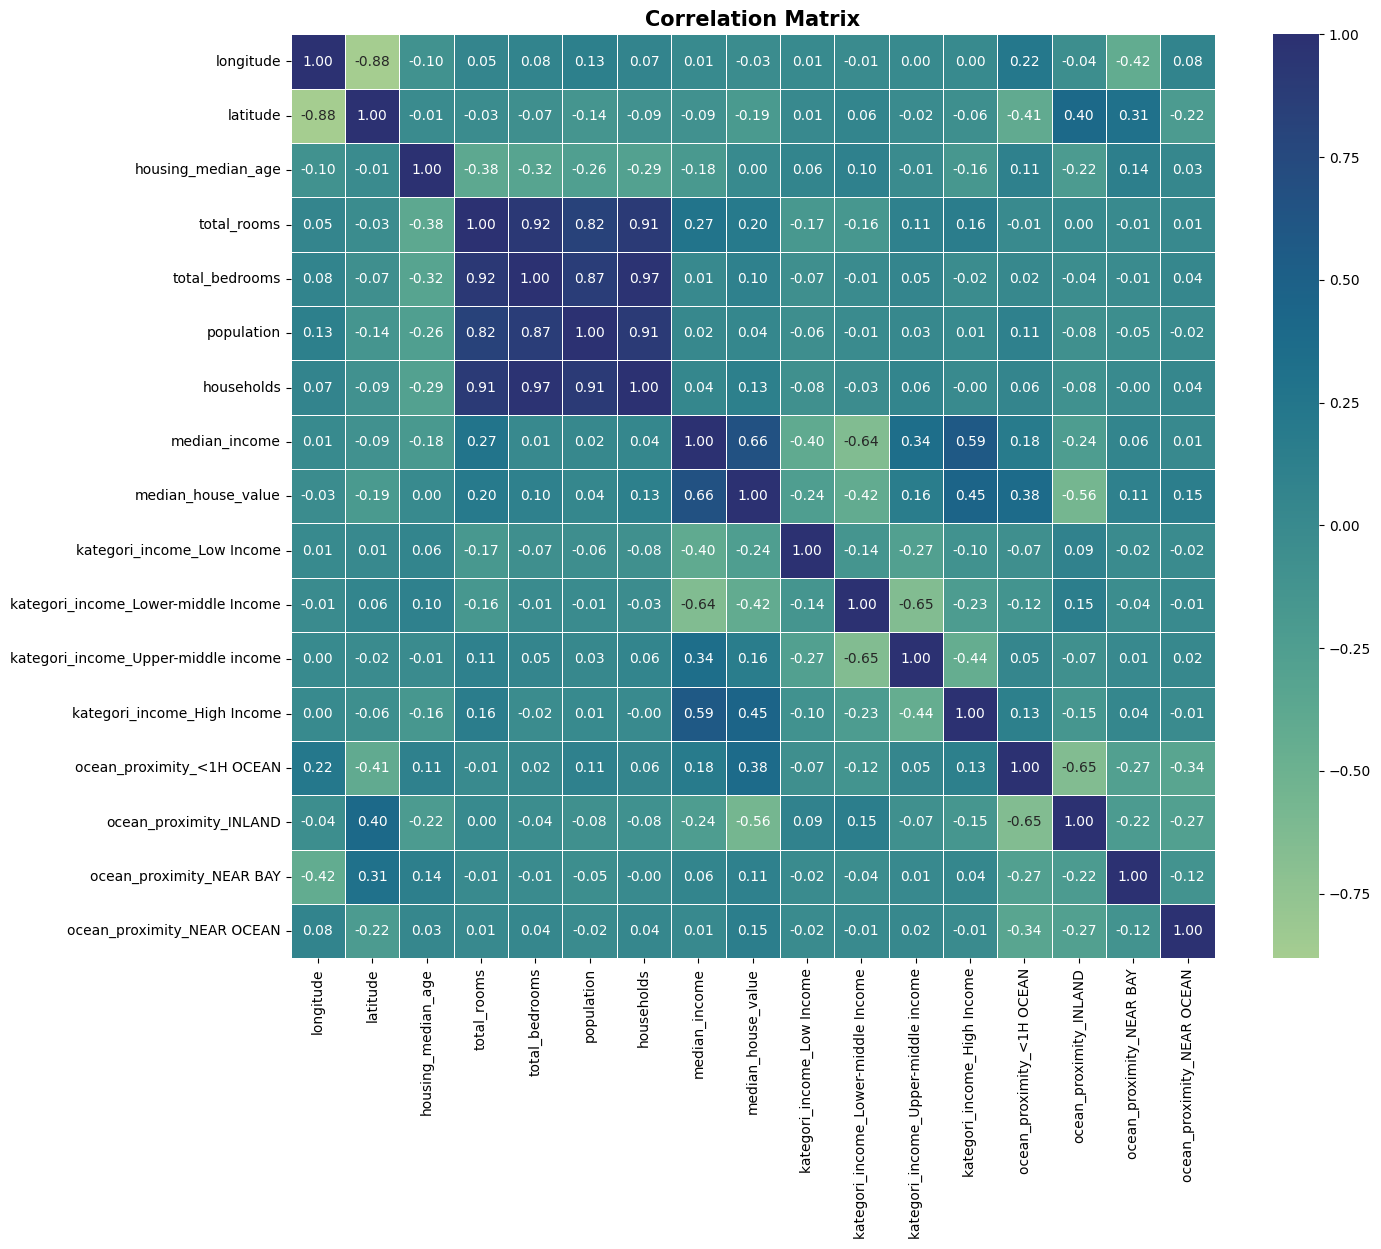

In [59]:
dfCorr = pd.get_dummies(df_model, columns=['kategori_income', 'ocean_proximity'])

plt.figure(figsize=(15, 12))
corrModel = dfCorr.corr(method='spearman')
sns.heatmap(corrModel, annot=True, fmt='.2f', cmap='crest', square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold');

Secara gari besar, semakin tinggi nilai independent variable  maka akan berkontribusi positif serta dependent variable juga akan naik. Korelasi negatif antara independent variable dengan dependent variable akan berbanding terbalik dari korelasi positif dimana semakin tinggi nilai independent variable maka akan berkontribusi kepada semakin rendahnya nilai dependent variable, dan sebaliknya.

# Conclusion

1. Diantara 3 model regresi, XGBoost terbukti adalah model regresi dalam memberikan prediksi nilai rumah pada dataset ini.
2. Variabel penting pada dataset yaitu One Hot Ocean Proximity Inland.
3. hasil perbandingan antara model XGBoost sebelum tunning dan setelah tunning, didapatkan hasil performanya mengalami kenaikan untuk semua aspek (RMSE, MAE, dan MAPE). hal ini terbukti karena memang fungsi dari data tunning yaitu untuk mencari nilai optimal dan memperbaiki kinerja model.
4. Hasil dari R-square seteleh proses Tunning didapat R-Square 0.787%.


# Recomendation

1. Penelitian selanjutnya dapat menambah dan memberikan kategori - kategori yang lebih relefan dan berkaitan satu sama lainnya.
2. melibatkan penggunaan regresi yang lebih banyak lagi, sehingga akan menemukan regresi yang terbaik.
3. menggunakan variasi model yang lebih banyak. terlebih menggunakan model yang memang lebih cocok untuk penentuan harga.


In [60]:
# Save model
import pickle

estimator = Pipeline([('preprocess', transformer), ('model', XGBRegressor())])
estimator.fit(X_train, y_train)

pickle.dump(estimator, open('data_california_house_Regression.sav', 'wb'))

In [55]:
df.to_csv("data_california_income_cat.csv", index=False)